# Import Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the Dataset

In [100]:
df=pd.read_csv("https://raw.githubusercontent.com/Mariam-Elmasry/Tuwaiq_Four_Week/master/Pair_KMeans/Mall_Customers.csv?token=AWSBQ4DFGSQZOEMU4XDFSQ3BXBRQW")

In [101]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Cleaning & Preprocessing

In [102]:
df.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [103]:
df.duplicated().sum()

0

In [135]:
df.rename(columns={'Genre': 'Gender', 'Annual_Income_(k$)': 'Annual_Income'}, inplace = True)

In [136]:
df.Gender.replace('Male', 0, inplace=True)
df.Gender.replace('Female', 1, inplace=True)
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


# EDA

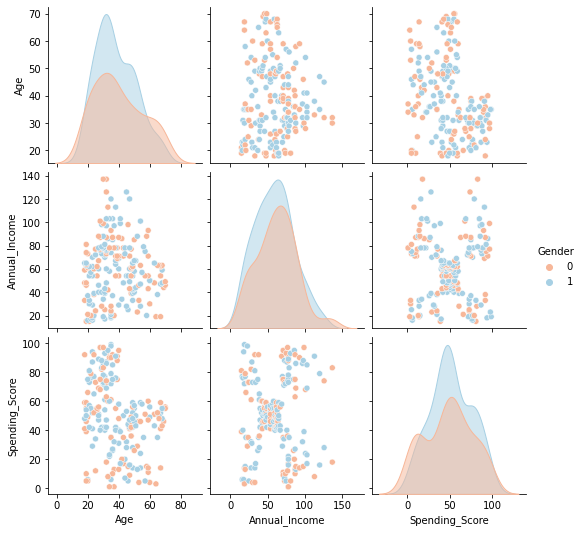

<Figure size 432x288 with 0 Axes>

In [157]:
#sns.pairplot(df, vars=["Age", "Annual_Income", "Spending_Score"],  kind ="reg", hue = "Gender")

sns.pairplot(df, vars=["Age", "Annual_Income", "Spending_Score"],
        kind='scatter',
        hue='Gender',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

# Modeling

In [143]:
X = df.iloc[:, [3, 4]].values

In [144]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [145]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

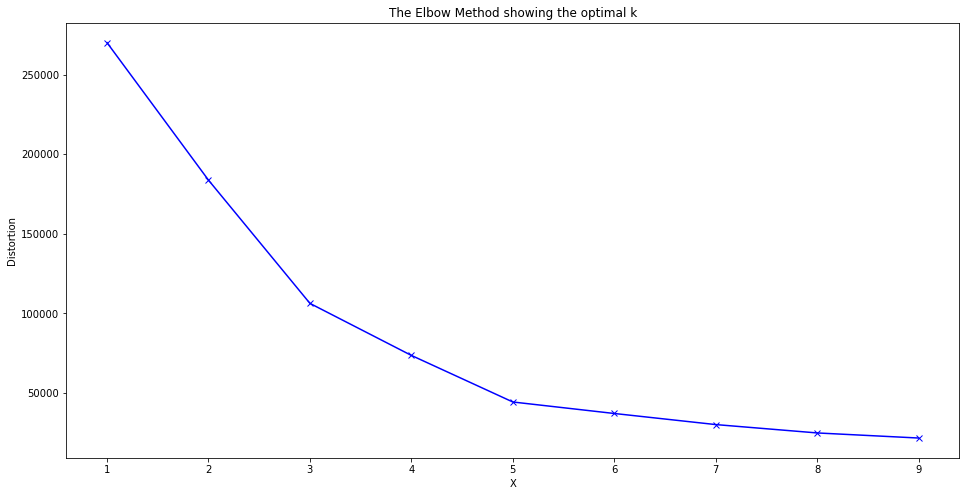

In [146]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('X')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [147]:
y_kmeans= KMeans(n_clusters=3)
y_kmeans.fit(X)

KMeans(n_clusters=3)

In [148]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Mariam-Elmasry/Tuwaiq_Four_Week/master/Pair_KMeans/Mall_Customers.csv?token=AWSBQ4DFGSQZOEMU4XDFSQ3BXBRQW')
X = dataset.iloc[:, [3, 4]].values
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans


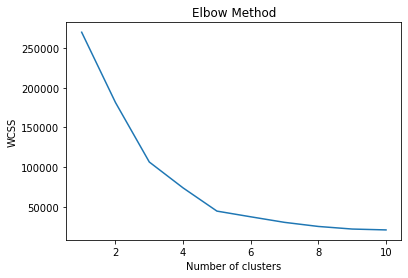

In [149]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

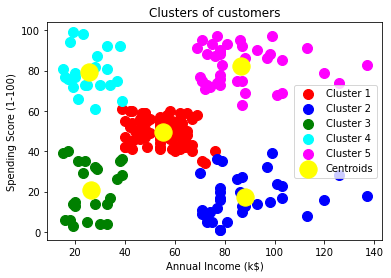

In [150]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show
